# Util

In [7]:
pip install JSAnimation

  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11424 sha256=174230ccb81a1fc05378f88533188968d5ea0a148883eaea9aeff416b5e358a1
  Stored in directory: /Users/swbaek/Library/Caches/pip/wheels/b1/78/80/8fa3ee5db5b384c086dcc7e6c4e4e22caae0687a4f71ba08f8
Successfully built JSAnimation
Note: you may need to restart the kernel to use updated packages.


In [6]:
import time
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from JSAnimation import IPython_display
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

Normalizer class

In [1]:
class nzr(object):
    def __init__(self,_rawdata,_eps=1e-8):
        self.rawdata = _rawdata
        self.eps     = _eps
        self.mu      = np.mean(self.rawdata,axis=0)
        self.std     = np.std(self.rawdata,axis=0)
        """ GET NORMALIZED VAL """
        self.nzd_data = self.get_nzdval(self.rawdata)
        """ GET  ORIGIANL VAL """
        self.org_data = self.get_orgval(self.nzd_data)
        """ CHECK ERROR """
        self.maxerr = np.max(self.rawdata-self.org_data)
    def get_nzdval(self,_data):
        _n = _data.shape[0]
        _nzddata = (_data - np.tile(self.mu,(_n,1))) / np.tile(self.std+self.eps,(_n,1))
        return _nzddata
    def get_orgval(self,_data):
        _n = _data.shape[0]
        _orgdata = _data*np.tile(self.std+self.eps,(_n,1))+np.tile(self.mu,(_n,1))
        return _orgdata

Plot related 

In [2]:
def animate_frames(_frames,_figsize=(5,5),_title=''):
    fig = plt.figure(figsize=_figsize)
    hImg = plt.imshow(_frames[0],interpolation='none')
    if len(_frames[0].shape) == 2:
        plt.colorbar()
        plt.clim(np.min(_frames),np.max(_frames))
    nFrame = len(_frames)
    hTitle = plt.title('[%d/%d]%s'%(1,nFrame,_title))
    def init():
        hImg.set_data(_frames[0])
        return hImg,
    def animate(i):
        hTitle.set_text('[%d/%d] %s'%(i+1,nFrame,_title))
        hImg.set_data(_frames[i])
        return hImg,
    anim = animation.FuncAnimation(fig,animate,init_func=init,
                            frames=nFrame,interval=100, blit=True)
    display(display_animation(anim, default_mode='loop'))

Check 'animate_frames'

In [5]:
import numpy as np

if __name__ == "__main__":
    frames = []
    for i in range(10):
        frames.append(np.random.rand(28,28))
    animate_frames(_frames=frames,_figsize=(5,5))

NameError: name 'plt' is not defined

Tensorflow related

In [7]:
def gpusession():
    config = tf.ConfigProto(); 
    config.gpu_options.allow_growth=True
    sess = tf.Session(config=config)
    return sess

1-D regression task

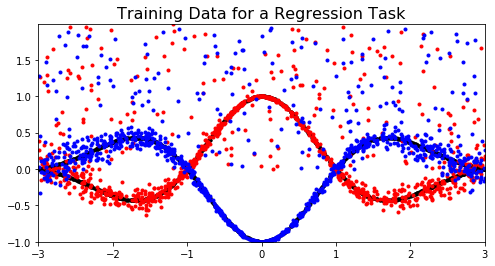

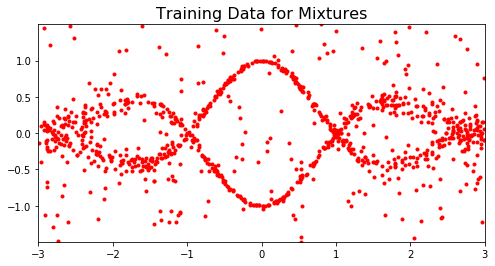

In [8]:
def data4regression(_n=1000,_xmin=-3,_xmax=+3
                    ,_outlier_min=-1.5,_outlier_max=+1.5,_outlierRate=0.1):
    np.random.seed(seed=0)
    x1 = np.float32(np.random.uniform(_xmin,_xmax,((int)(_n),1)))
    r1 = np.array([np.random.normal(scale=np.abs(i)/20) for i in x1])
    r2 = np.array([np.random.normal(scale=np.abs(i)/20) for i in x1])
    y1 = np.cos(np.pi/2*x1)*np.exp(-(x1/2)**2) 
    y2 = -np.cos(np.pi/2*x1)*np.exp(-(x1/2)**2)
    references = np.concatenate((y1,y2),axis=1)
    y1,y2 = y1+r1,y2+r2
    # Add outliers 
    nOutlier = (int)(_n*_outlierRate)
    _t1 = _outlier_max-_outlier_min
    _t2 = _outlier_min
    y1[np.random.permutation((int)(_n))[:nOutlier],:] = _t1*np.random.rand(nOutlier,1)+_t2
    y2[np.random.permutation((int)(_n))[:nOutlier],:] = _t1*np.random.rand(nOutlier,1)+_t2
    inputs,outputs = x1,np.concatenate((y1,y2),axis=1)
    return inputs,outputs,references
def data4mixtures(_n=1000,_xmin=-3,_xmax=+3,_outlier_min=-1.5,_outlier_max=+1.5,_outlierRate=0.1):
    np.random.seed(seed=0)
    x1 = np.float32(np.random.uniform(_xmin,_xmax,((int)(_n/2),1)))
    r1 = np.array([np.random.normal(scale=np.abs(i)/20) for i in x1])
    y1 = np.cos(np.pi/2*x1)*np.exp(-(x1/2)**2) + r1
    x2 = np.float32(np.random.uniform(_xmin,_xmax,((int)(_n/2),1)))
    r2 = np.array([np.random.normal(scale=np.abs(i)/20) for i in x2])
    y2 = -np.cos(np.pi/2*x2)*np.exp(-(x2/2)**2) + r2
    nOutlier = (int)(_n/2*_outlierRate)
    _t1 = _outlier_max-_outlier_min
    _t2 = _outlier_min
    y1[np.random.permutation((int)(_n/2))[:nOutlier],:] = _t1*np.random.rand(nOutlier,1)+_t2
    y2[np.random.permutation((int)(_n/2))[:nOutlier],:] = _t1*np.random.rand(nOutlier,1)+_t2
    inputs,outputs = np.concatenate((x1,x2),axis=0),np.concatenate((y1,y2),axis=0)
    return inputs,outputs
if __name__ == "__main__":
    # Regression task
    xmin,xmax = -3,+3
    inputs,outputs,references = data4regression(_n=1000,_xmin=xmin,_xmax=+xmax
                                                ,_outlier_min=0,_outlier_max=2,_outlierRate=0.2)
    plt.figure(figsize=(8,4)),plt.axis([xmin,xmax,np.min(outputs),np.max(outputs)])
    plt.plot(inputs,references[:,0],'k.'),plt.plot(inputs,references[:,1],'k.')
    plt.plot(inputs,outputs[:,0],'r.'),plt.plot(inputs,outputs[:,1],'b.')
    plt.title('Training Data for a Regression Task',fontsize=16)
    # Mixture task
    xmin,xmax = -3,+3
    inputs,outputs = data4mixtures(_n=1000,_xmin=xmin,_xmax=+xmax,_outlierRate=0.2)
    plt.figure(figsize=(8,4)),plt.axis([xmin,xmax,np.min(outputs),np.max(outputs)])
    plt.plot(inputs,outputs[:,0],'r.')
    plt.title('Training Data for Mixtures',fontsize=16)